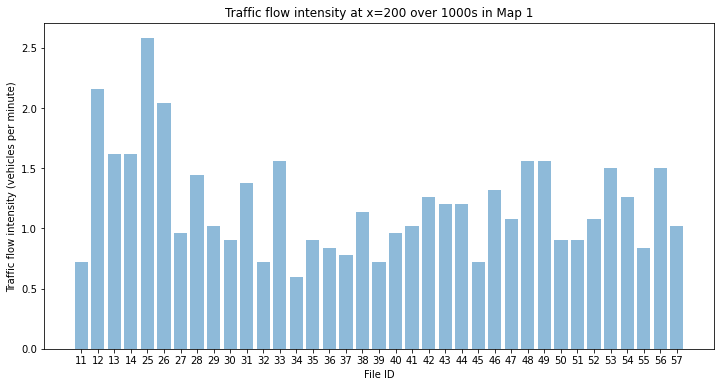

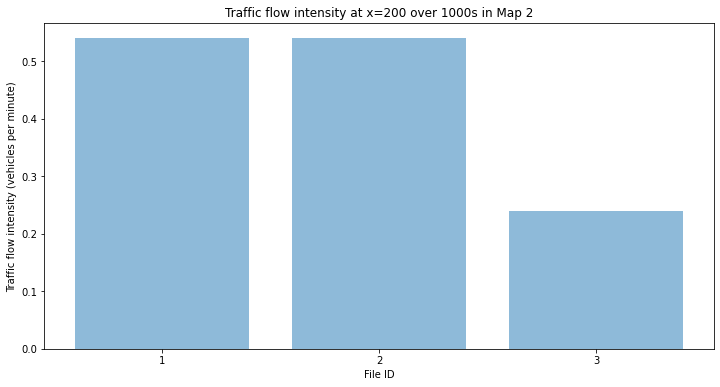

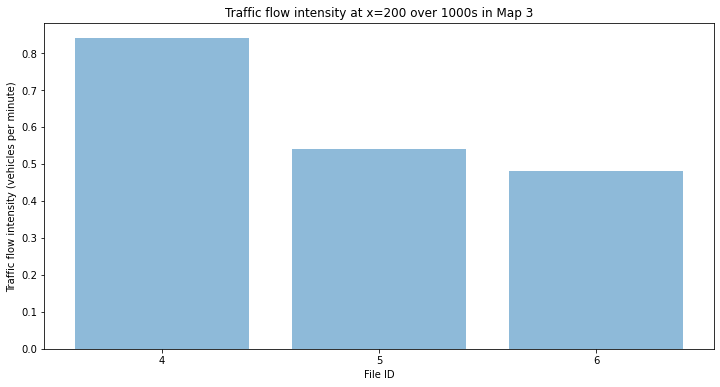

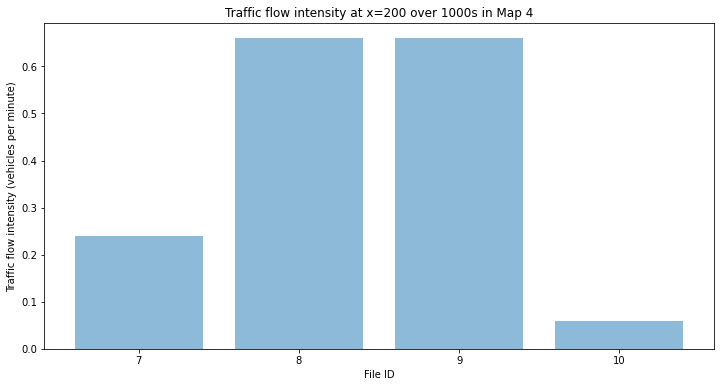

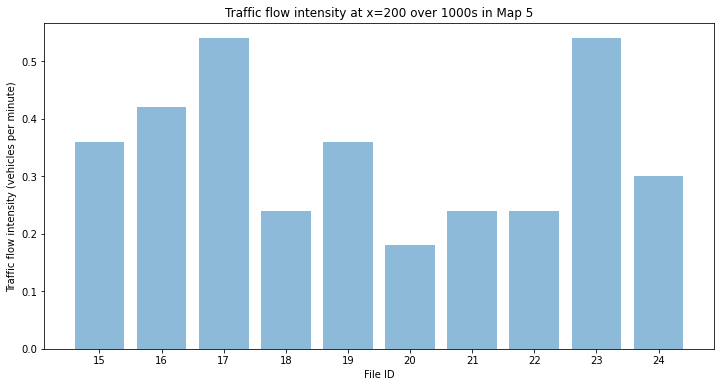

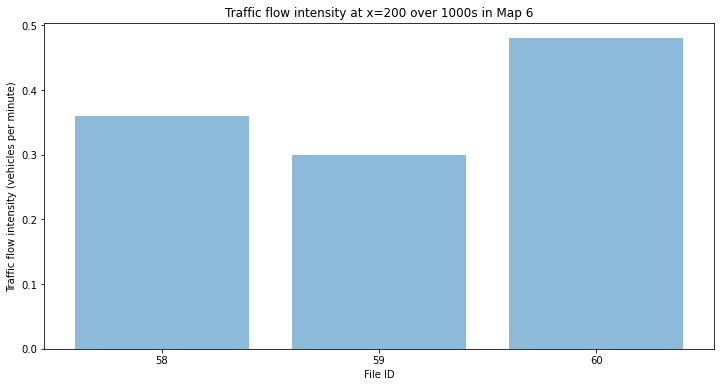

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import gaussian_kde

# 需要检测的交通流位置
x = 200

# 记录时间段
time_span = 1000 # seconds

data_path = "D:/荷兰/TUe/课程/Team Project/Dataset/highd-dataset-v1.0/data"
n_files = 60
data_dict = {}

# 地图 ID 列表
map_ids = [1, 2, 3, 4, 5, 6]

for map_id in map_ids:
    print(f"processing map {map_id}...\r", end="")
    results = []
    location_id = []

    for i in range(n_files):
        file_name1 = f"{i+1:02d}_tracks.csv"
        file_path1 = os.path.join(data_path, file_name1)
        file_name2 = f"{i+1:02d}_recordingMeta.csv"
        file_path2 = os.path.join(data_path, file_name2)
        recording_meta = pd.read_csv(file_path2)

        if recording_meta["locationId"][0] != map_id:
            continue

        tracks = pd.read_csv(file_path1)
        location_id.append(i+1)

        mask = (tracks["frame"] >= 0) & (tracks["frame"] <= time_span * recording_meta["frameRate"][0])
        vehicles = tracks[mask & (tracks["x"] == x)]["id"].unique()
        count = len(vehicles)

        minutes = time_span / 60
        intensity = count / minutes

        results.append(intensity)

    # 绘制图表
    plt.figure(figsize=(12, 6))
    plt.bar(np.arange(len(results)), results, align='center', alpha=0.5)
    plt.xticks(np.arange(len(location_id)), location_id)
    plt.xlabel('File ID')
    plt.ylabel('Traffic flow intensity (vehicles per minute)')
    plt.title(f'Traffic flow intensity at x={x} over {time_span}s in Map {map_id}')
    plt.show()

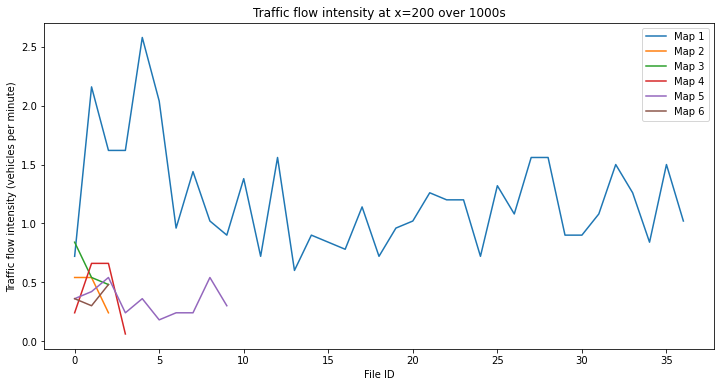

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import gaussian_kde

# 需要检测的交通流位置
x = 200

# 记录时间段
time_span = 1000 # seconds

data_path = "D:/荷兰/TUe/课程/Team Project/Dataset/highd-dataset-v1.0/data"
n_files = 60
data_dict = {}

# 地图 ID 列表
map_ids = [1, 2, 3, 4, 5, 6]

# 初始化一个字典来存储数据
data_dict = {map_id: [] for map_id in map_ids}

for map_id in map_ids:
    print(f"processing map {map_id}...\r", end="")

    for i in range(n_files):
        file_name1 = f"{i+1:02d}_tracks.csv"
        file_path1 = os.path.join(data_path, file_name1)
        file_name2 = f"{i+1:02d}_recordingMeta.csv"
        file_path2 = os.path.join(data_path, file_name2)
        recording_meta = pd.read_csv(file_path2)

        if recording_meta["locationId"][0] != map_id:
            continue

        tracks = pd.read_csv(file_path1)

        mask = (tracks["frame"] >= 0) & (tracks["frame"] <= time_span * recording_meta["frameRate"][0])
        vehicles = tracks[mask & (tracks["x"] == x)]["id"].unique()
        count = len(vehicles)

        minutes = time_span / 60
        intensity = count / minutes

        data_dict[map_id].append(intensity)

# 绘制图表
plt.figure(figsize=(12, 6))
for map_id in map_ids:
    plt.plot(np.arange(len(data_dict[map_id])), data_dict[map_id], label=f"Map {map_id}")
plt.legend()
plt.xlabel('File ID')
plt.ylabel('Traffic flow intensity (vehicles per minute)')
plt.title(f'Traffic flow intensity at x={x} over {time_span}s')
plt.show()


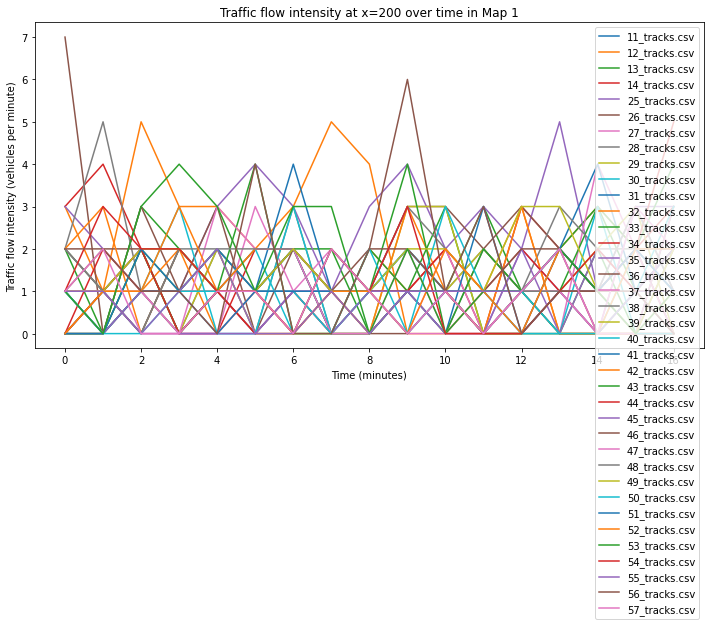

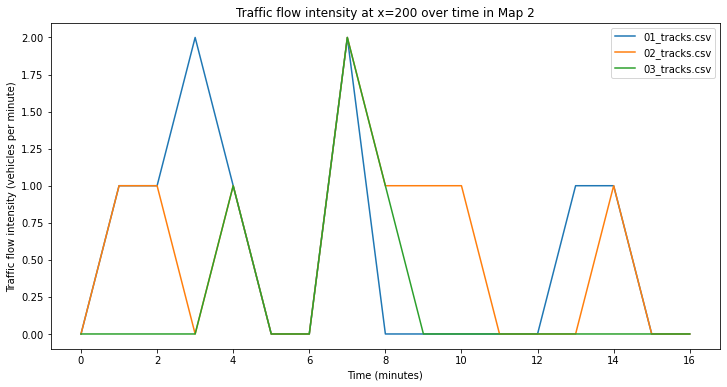

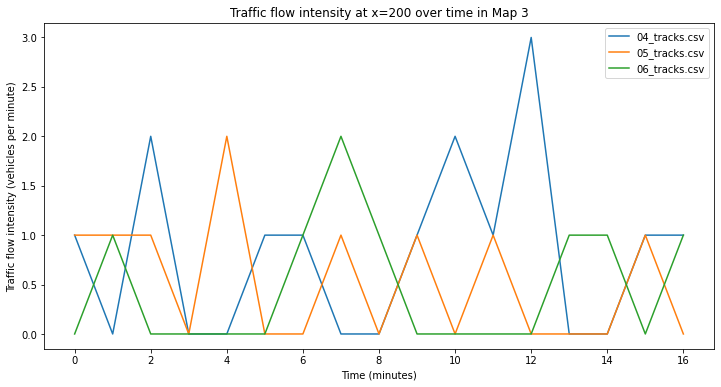

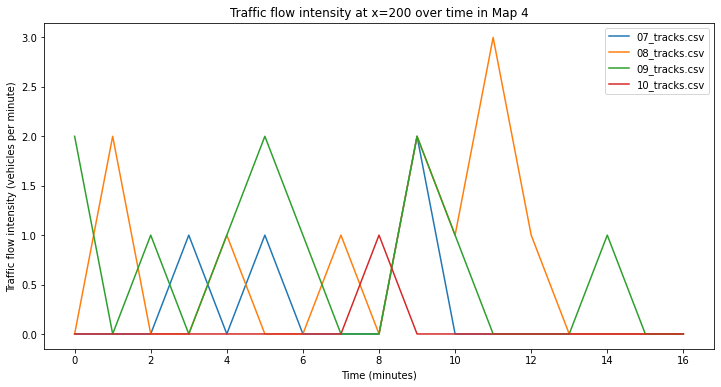

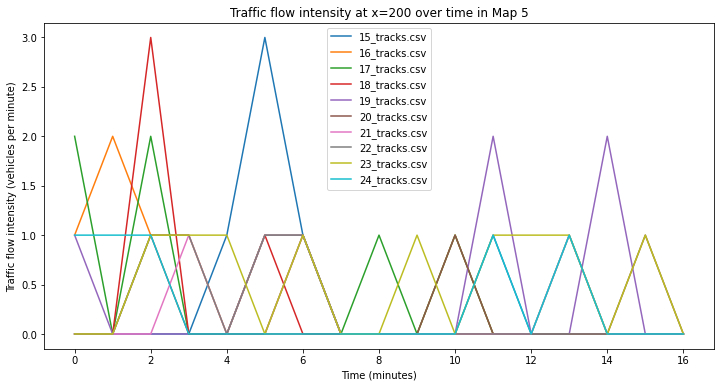

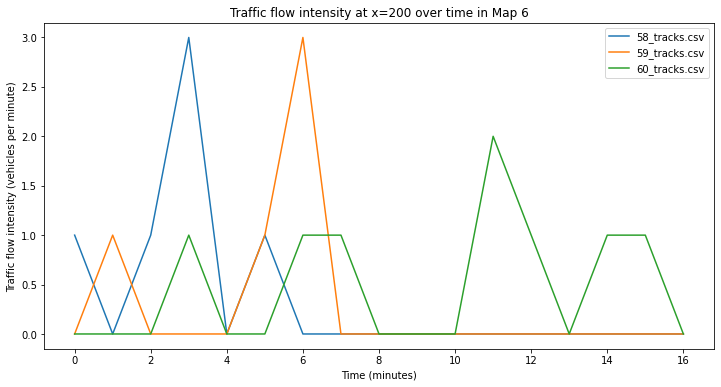

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# 需要检测的交通流位置
x = 200

# 记录时间段
time_span = 1000 # seconds
time_interval = 60 # seconds

data_path = "D:/荷兰/TUe/课程/Team Project/Dataset/highd-dataset-v1.0/data"
n_files = 60
data_dict = {}

# 地图 ID 列表
map_ids = [1, 2, 3, 4, 5, 6]

for map_id in map_ids:
    print(f"processing map {map_id}...\r", end="")
    results = {}
    files = []
    
    for i in range(n_files):
        file_name1 = f"{i+1:02d}_tracks.csv"
        file_path1 = os.path.join(data_path, file_name1)
        file_name2 = f"{i+1:02d}_recordingMeta.csv"
        file_path2 = os.path.join(data_path, file_name2)
        recording_meta = pd.read_csv(file_path2)

        if recording_meta["locationId"][0] != map_id:
            continue

        tracks = pd.read_csv(file_path1)
        files.append(file_name1)
        
        mask = (tracks["frame"] >= 0) & (tracks["frame"] <= time_span * recording_meta["frameRate"][0])
        vehicles = tracks[mask & (tracks["x"] == x)]["id"].unique()
        counts = []

        for t in range(0, time_span, time_interval):
            mask = (tracks["frame"] >= t * recording_meta["frameRate"][0]) & (tracks["frame"] < (t + time_interval) * recording_meta["frameRate"][0])
            vehicles = tracks[mask & (tracks["x"] == x)]["id"].unique()
            count = len(vehicles)
            intensity = count / (time_interval / 60)
            counts.append(intensity)

        results[file_name1] = counts

    # 绘制图表
    plt.figure(figsize=(12, 6))
    plt.title(f'Traffic flow intensity at x={x} over time in Map {map_id}')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Traffic flow intensity (vehicles per minute)')
    
    for file_name1 in files:
        counts = results[file_name1]
        plt.plot(np.arange(len(counts)), counts, label=file_name1)
        
    plt.legend()
    plt.show()


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# 需要检测的交通流位置
x = 200

# 记录时间段
time_span = 1000 # seconds
time_interval = 60 # seconds

data_path = "D:/荷兰/TUe/课程/Team Project/Dataset/highd-dataset-v1.0/data"
n_files = 60
data_dict = {}

# 地图 ID 列表
map_ids = [1, 2, 3, 4, 5, 6]

for map_id in map_ids:
    print(f"processing map {map_id}...\r", end="")
    results = {}
    files = []
    
    for i in range(n_files):
        file_name1 = f"{i+1:02d}_tracks.csv"
        file_path1 = os.path.join(data_path, file_name1)
        file_name2 = f"{i+1:02d}_recordingMeta.csv"
        file_path2 = os.path.join(data_path, file_name2)
        recording_meta = pd.read_csv(file_path2)

        if recording_meta["locationId"][0] != map_id:
            continue

        tracks = pd.read_csv(file_path1)
        files.append(file_name1)
        
        mask = (tracks["frame"] >= 0) & (tracks["frame"] <= time_span * recording_meta["frameRate"][0])
        vehicles = tracks[mask & (tracks["x"] == x)]["id"].unique()
        counts = []

        for t in range(0, time_span, time_interval):
            mask = (tracks["frame"] >= t * recording_meta["frameRate"][0]) & (tracks["frame"] < (t + time_interval) * recording_meta["frameRate"][0])
            vehicles = tracks[mask & (tracks["x"] == x)]["id"].unique()
            count = len(vehicles)
            intensity = count / (time_interval / 60)
            counts.append(intensity)

        results[file_name1] = counts
        
        # 绘制图表并保存为文件
        plt.figure(figsize=(12, 6))
        plt.title(f'Traffic flow intensity at x={x} over time in Map {map_id} ({file_name1})')
        plt.xlabel('Time (minutes)', color='green')
        plt.ylabel('Traffic flow intensity (vehicles per minute)', color='blue')
        plt.plot(np.arange(len(counts)), counts, color='red')
        plt.xticks(np.arange(0, len(counts)+1, 5))
        plt.yticks(np.arange(0, max(counts)+1, 2))
        plt.grid(axis='y', linestyle='--')
        plt.savefig(f"map{map_id}_file{i+1}.png")
        plt.close()

print("Done!")


Done!ssing map 6...


In [44]:
import pandas as pd
import os
import csv

# 需要检测的交通流位置
x = 200

# 记录时间段
time_span = 1000 # seconds
time_interval = 60 # seconds

data_path = "D:/荷兰/TUe/课程/Team Project/Dataset/highd-dataset-v1.0/data"
n_files = 60
data_dict = {}

# 地图 ID 列表
map_ids = [1, 2, 3, 4, 5, 6]

output_path = "output"

if not os.path.exists(output_path):
    os.makedirs(output_path)

for map_id in map_ids:
    print(f"processing map {map_id}...\r", end="")
    
    for i in range(n_files):
        file_name1 = f"{i+1:02d}_tracks.csv"
        file_path1 = os.path.join(data_path, file_name1)
        file_name2 = f"{i+1:02d}_recordingMeta.csv"
        file_path2 = os.path.join(data_path, file_name2)
        recording_meta = pd.read_csv(file_path2)

        if recording_meta["locationId"][0] != map_id:
            continue

        tracks = pd.read_csv(file_path1)
        file_base_name = os.path.splitext(file_name1)[0]
        
        mask = (tracks["frame"] >= 0) & (tracks["frame"] <= time_span * recording_meta["frameRate"][0])
        vehicles = tracks[mask & (tracks["x"] == x)]["id"].unique()
        counts = []

        for t in range(0, time_span, time_interval):
            mask = (tracks["frame"] >= t * recording_meta["frameRate"][0]) & (tracks["frame"] < (t + time_interval) * recording_meta["frameRate"][0])
            vehicles = tracks[mask & (tracks["x"] == x)]["id"].unique()
            count = len(vehicles)
            intensity = count / (time_interval / 60)
            counts.append(intensity)

        # 将交通流强度写入CSV文件
        output_file_name = file_base_name + ".csv"
        output_file_path = os.path.join(output_path, output_file_name)
        with open(output_file_path, mode='w', newline='') as output_file:
            output_writer = csv.writer(output_file)
            output_writer.writerow(["Time (minutes)", "Traffic flow intensity (vehicles per minute)"])
            for t, intensity in enumerate(counts):
                output_writer.writerow([t, intensity])
                
print("Done!")


Done!ssing map 6...


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# 需要检测的交通流位置
x = 200

# 记录时间段
time_span = 1000 # seconds
time_interval = 60 # seconds

data_path = "D:/荷兰/TUe/课程/Team Project/Dataset/highd-dataset-v1.0/data"
n_files = 60
data_dict = {}

# 地图 ID 列表
map_ids = [1, 2, 3, 4, 5, 6]

for map_id in map_ids:
    print(f"processing map {map_id}...\r", end="")
    results = {}
    files = []
    
    for i in range(n_files):
        file_name1 = f"{i+1:02d}_tracks.csv"
        file_path1 = os.path.join(data_path, file_name1)
        file_name2 = f"{i+1:02d}_recordingMeta.csv"
        file_path2 = os.path.join(data_path, file_name2)
        recording_meta = pd.read_csv(file_path2)

        if recording_meta["locationId"][0] != map_id:
            continue

        tracks = pd.read_csv(file_path1)
        files.append(file_name1)
        
        counts = []

        for t in range(0, time_span, time_interval):
            mask = (tracks["frame"] >= t * recording_meta["frameRate"][0]) & (tracks["frame"] < (t + time_interval) * recording_meta["frameRate"][0])
            vehicles = tracks[mask & (tracks["x"] == x)]["id"].unique()
            count = len(vehicles)
            intensity = count / (time_interval / 60)
            counts.append(intensity)

        results[file_name1] = counts
        
        # 绘制图表并保存为文件
        plt.figure(figsize=(12, 6))
        plt.title(f'Traffic flow intensity at x={x} over time in Map {map_id} ({file_name1})')
        plt.xlabel('Time (minutes)', color='green')
        plt.ylabel('Traffic flow intensity (vehicles per minute)', color='blue')
        plt.plot(np.arange(len(counts)), counts, color='red')
        plt.xticks(np.arange(0, len(counts)+1, 5))
        plt.yticks(np.arange(0, max(counts)+1, 2))
        plt.grid(axis='y', linestyle='--')
        plt.savefig(f"map{map_id}_file{i+1}.png")
        plt.close()

print("Done!")


Done!ssing map 6...


In [3]:
import pandas as pd
import os

# 需要检测的交通流位置
x = 200

# 记录时间段
time_span = 1000 # seconds
time_interval = 60 # seconds

data_path = "D:/荷兰/TUe/课程/Team Project/Dataset/highd-dataset-v1.0/data"
n_files = 60
data_dict = {}

# 地图 ID 列表
map_ids = [1, 2, 3, 4, 5, 6]

# 输出目录
output_dir = "output"

# 创建输出目录
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for map_id in map_ids:
    print(f"processing map {map_id}...\r", end="")
    
    # 创建当前地图的输出目录
    map_output_dir = os.path.join(output_dir, f"map{map_id}")
    if not os.path.exists(map_output_dir):
        os.makedirs(map_output_dir)
    
    for i in range(n_files):
        file_name1 = f"{i+1:02d}_tracks.csv"
        file_path1 = os.path.join(data_path, file_name1)
        file_name2 = f"{i+1:02d}_recordingMeta.csv"
        file_path2 = os.path.join(data_path, file_name2)
        recording_meta = pd.read_csv(file_path2)

        if recording_meta["locationId"][0] != map_id:
            continue

        tracks = pd.read_csv(file_path1)
        
        mask = (tracks["frame"] >= 0) & (tracks["frame"] <= time_span * recording_meta["frameRate"][0])
        vehicles = tracks[mask & (tracks["x"] == x)]["id"].unique()
        counts = []

        for t in range(0, time_span, time_interval):
            mask = (tracks["frame"] >= t * recording_meta["frameRate"][0]) & (tracks["frame"] < (t + time_interval) * recording_meta["frameRate"][0])
            vehicles = tracks[mask & (tracks["x"] == x)]["id"].unique()
            count = len(vehicles)
            intensity = count / (time_interval / 60)
            counts.append(intensity)

        # 将数据存储到 DataFrame 中
        data = pd.DataFrame(counts, columns=["flow_intensity"])
        data.index.name = "time_interval"
        
        # 输出到 CSV 文件
        output_file = os.path.join(map_output_dir, f"{file_name1.split('.')[0]}_flow_intensity.csv")
        data.to_csv(output_file)

print("Done!")


Done!ssing map 6...


In [4]:
import pandas as pd
import os
import csv

# 需要检测的交通流位置
x = 200

# 记录时间段
time_span = 1000 # seconds
time_interval = 60 # seconds

data_path = "D:/荷兰/TUe/课程/Team Project/Dataset/highd-dataset-v1.0/data"
n_files = 60
data_dict = {}

# 地图 ID 列表
map_ids = [1, 2, 3, 4, 5, 6]

output_path = "output"

if not os.path.exists(output_path):
    os.makedirs(output_path)

for map_id in map_ids:
    print(f"processing map {map_id}...\r", end="")
    
    for i in range(n_files):
        file_name1 = f"{i+1:02d}_tracks.csv"
        file_path1 = os.path.join(data_path, file_name1)
        file_name2 = f"{i+1:02d}_recordingMeta.csv"
        file_path2 = os.path.join(data_path, file_name2)
        recording_meta = pd.read_csv(file_path2)

        if recording_meta["locationId"][0] != map_id:
            continue

        tracks = pd.read_csv(file_path1)
        file_base_name = os.path.splitext(file_name1)[0]
        
        counts = []

        for t in range(0, time_span, time_interval):
            mask1 = (tracks["frame"] >= t * recording_meta["frameRate"][0]) & (tracks["frame"] < (t + time_interval) * recording_meta["frameRate"][0]) & (tracks["x"] == x)
            vehicles1 = tracks[mask1 & (tracks["y"] >= 0)]["id"].unique()
            count1 = len(vehicles1)
            intensity1 = count1 * (time_interval)

            mask2 = (tracks["frame"] >= t * recording_meta["frameRate"][0]) & (tracks["frame"] < (t + time_interval) * recording_meta["frameRate"][0]) & (tracks["x"] == x)
            vehicles2 = tracks[mask2 & (tracks["y"] < 0)]["id"].unique()
            count2 = len(vehicles2)
            intensity2 = count2 * (time_interval)

            counts.append(intensity1 + intensity2)

        # 将交通流强度写入CSV文件
        output_file_name = file_base_name + ".csv"
        output_file_path = os.path.join(output_path, output_file_name)
        with open(output_file_path, mode='w', newline='') as output_file:
            output_writer = csv.writer(output_file)
            output_writer.writerow(["Time (minutes)", "Traffic flow intensity (vehicles per minute)"])
            for t, intensity in enumerate(counts):
                output_writer.writerow([t, intensity])
                
print("Done!")

Done!ssing map 6...


In [15]:
import pandas as pd
import os
import csv

# Location of Traffic Flow
x1 = 200
x2 = 205

# Time Periord
time_span = 1000 # seconds
time_interval = 60 # seconds

data_path = "D:/荷兰/TUe/课程/Team Project/Dataset/highd-dataset-v1.0/data"
n_files = 60
data_dict = {}

# Map ID List
map_ids = [1, 2, 3, 4, 5, 6]

output_path = "output"

if not os.path.exists(output_path):
    os.makedirs(output_path)

for map_id in map_ids:
    print(f"processing map {map_id}...\r", end="")
    
    for i in range(n_files):
        file_name1 = f"{i+1:02d}_tracks.csv"
        file_path1 = os.path.join(data_path, file_name1)
        file_name2 = f"{i+1:02d}_recordingMeta.csv"
        file_path2 = os.path.join(data_path, file_name2)
        recording_meta = pd.read_csv(file_path2)

        if recording_meta["locationId"][0] != map_id:
            continue

        tracks = pd.read_csv(file_path1)
        file_base_name = os.path.splitext(file_name1)[0]
        
        counts1 = []
        counts2 = []

        for t in range(0, time_span, time_interval):
            # Calculating Forward Traffic Flow
            mask1 = (tracks["frame"] >= t * recording_meta["frameRate"][0]) & (tracks["frame"] < (t + time_interval) * recording_meta["frameRate"][0]) & (tracks["x"] >= x1) & (tracks["x"] <= x2)
            vehicles1 = tracks[mask1 & (tracks["y"] >= 0)]["id"].unique()
            count1 = len(vehicles1)
            intensity1 = count1 / (time_interval / 60)
            counts1.append(intensity1)
            
            # Calculate reverse traffic flow
            mask2 = (tracks["frame"] >= t * recording_meta["frameRate"][0]) & (tracks["frame"] < (t + time_interval) * recording_meta["frameRate"][0]) & ((tracks["x"] < x1) | (tracks["x"] > x2))
            vehicles2 = tracks[mask2 & (tracks["y"] < 0)]["id"].unique()
            count2 = len(vehicles2)
            intensity2 = count2 / (time_interval / 60)
            counts2.append(intensity2)

        # Write traffic flow intensities to a CSV file
        output_file_name = file_base_name + ".csv"
        output_file_path = os.path.join(output_path, output_file_name)
        with open(output_file_path, mode='w', newline='') as output_file:
            output_writer = csv.writer(output_file)
            output_writer.writerow(["Time (minutes)", "Traffic flow intensity (vehicles per minute)"])
            for t, (intensity1, intensity2) in enumerate(zip(counts1, counts2)):
                output_writer.writerow([t, intensity1 + intensity2])
                
print("Done!")

Done!ssing map 6...
